Unsupervised Algorithm And building machine learning Model
----------------------------------------------------------------------------------

Data Processing And building machine learning Model
----------------------------------------------------------------------------------

Steps of Preprocessing of Unsupervised Data
------------------------------------------------------------------
Step 1] - Import necessary libararies .
Step 2] - Read Data Set .
Step 3] - Sanity Check of Data
Step 4] - Exploratory Data Analysis [EDA]
Step 5] - Missing Value Treatments
Step 6] - Outliers Treatments.
Step 7] - Duplicates and Garbage Value treatment.
Step 8] - Encoding of Data  

# Iris dataset available in the sklearn library.

# Step 1: Import Necessary Library

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings as wr
wr.filterwarnings("ignore")


In the Iris dataset, the target column represents the species (setosa, versicolor, virginica). Since clustering aims to find groups based on the features (sepal length, sepal width, petal length, petal width), you should exclude the target column when clustering.




# Step 2: Read DataSet

In [6]:
iris =load_iris ()


In [63]:
# Create a DataFrame with only the features (excluding the target)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Display the dataset without the target column
print(df.head())



# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFeature names:")
print(iris.feature_names)
print("\nTarget names:")
print(iris.target_names)

df.columns

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Dataset shape: (150, 4)

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names:
['setosa' 'versicolor' 'virginica']


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [65]:
df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [64]:
#head
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
#tail
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Here, we're only using the feature columns (sepal length, sepal width, petal length, and petal width) for the unsupervised algorithm, ignoring the target column (species) because it's not relevant for clustering.



# Step 3: Sanity Check of Data

In [17]:
#Shape
df.shape

(150, 5)

In [18]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [19]:
#Finding Missing Values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [20]:
#For Finding The Percentage of Missing Value
df.isnull().sum()/df.shape[0]*100

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
target               0.0
dtype: float64

No missing values find. No need to treat missing values.

In [21]:
#Finding Duplicates 
df.duplicated().sum()

1

In [22]:

#If duplicates find ,execute these code

df.drop_duplicates(inplace=True) # drop duplicates and update df
df.duplicated().sum() # show duplicate count

0

In [24]:
#Identifying Garbage Value in object column
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

In [ ]:
#No garbage values and object values

# Step 4- Exploratory Data Analysis

In [25]:
#Descriptive Statistics
df.describe()  #Numerical Column


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [39]:
#No need to display the object type data, no object
#df.describe(include="object")

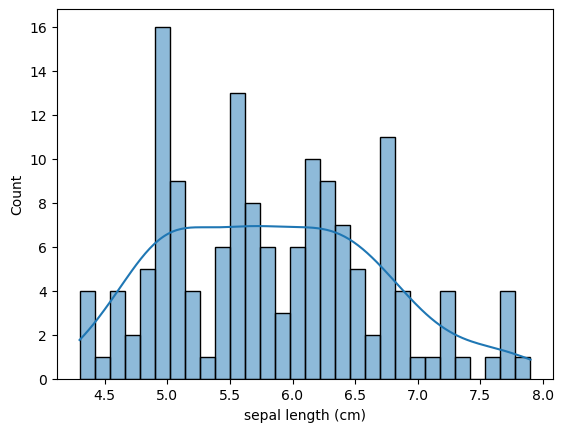

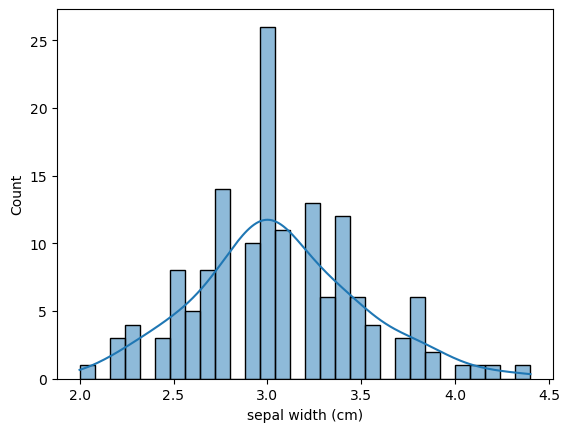

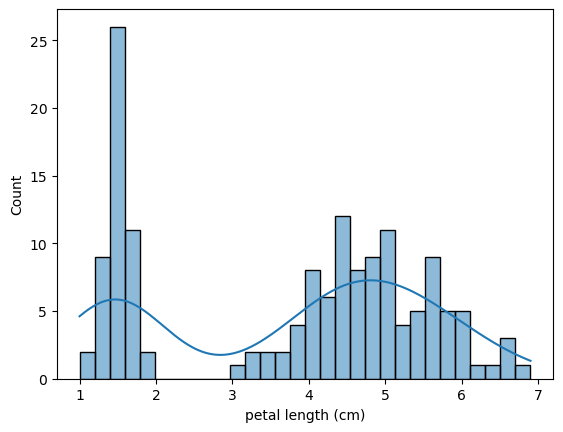

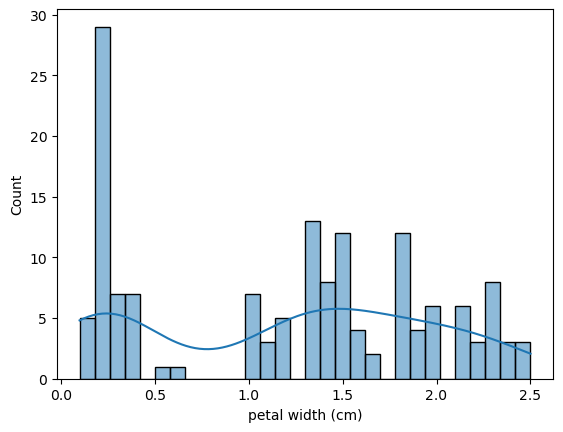

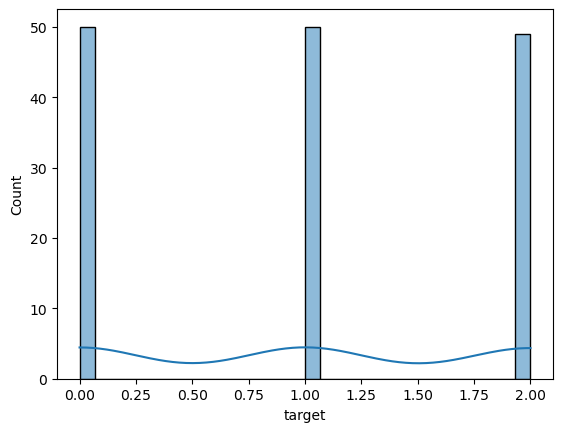

In [26]:
#Histogram to understand the distribution 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

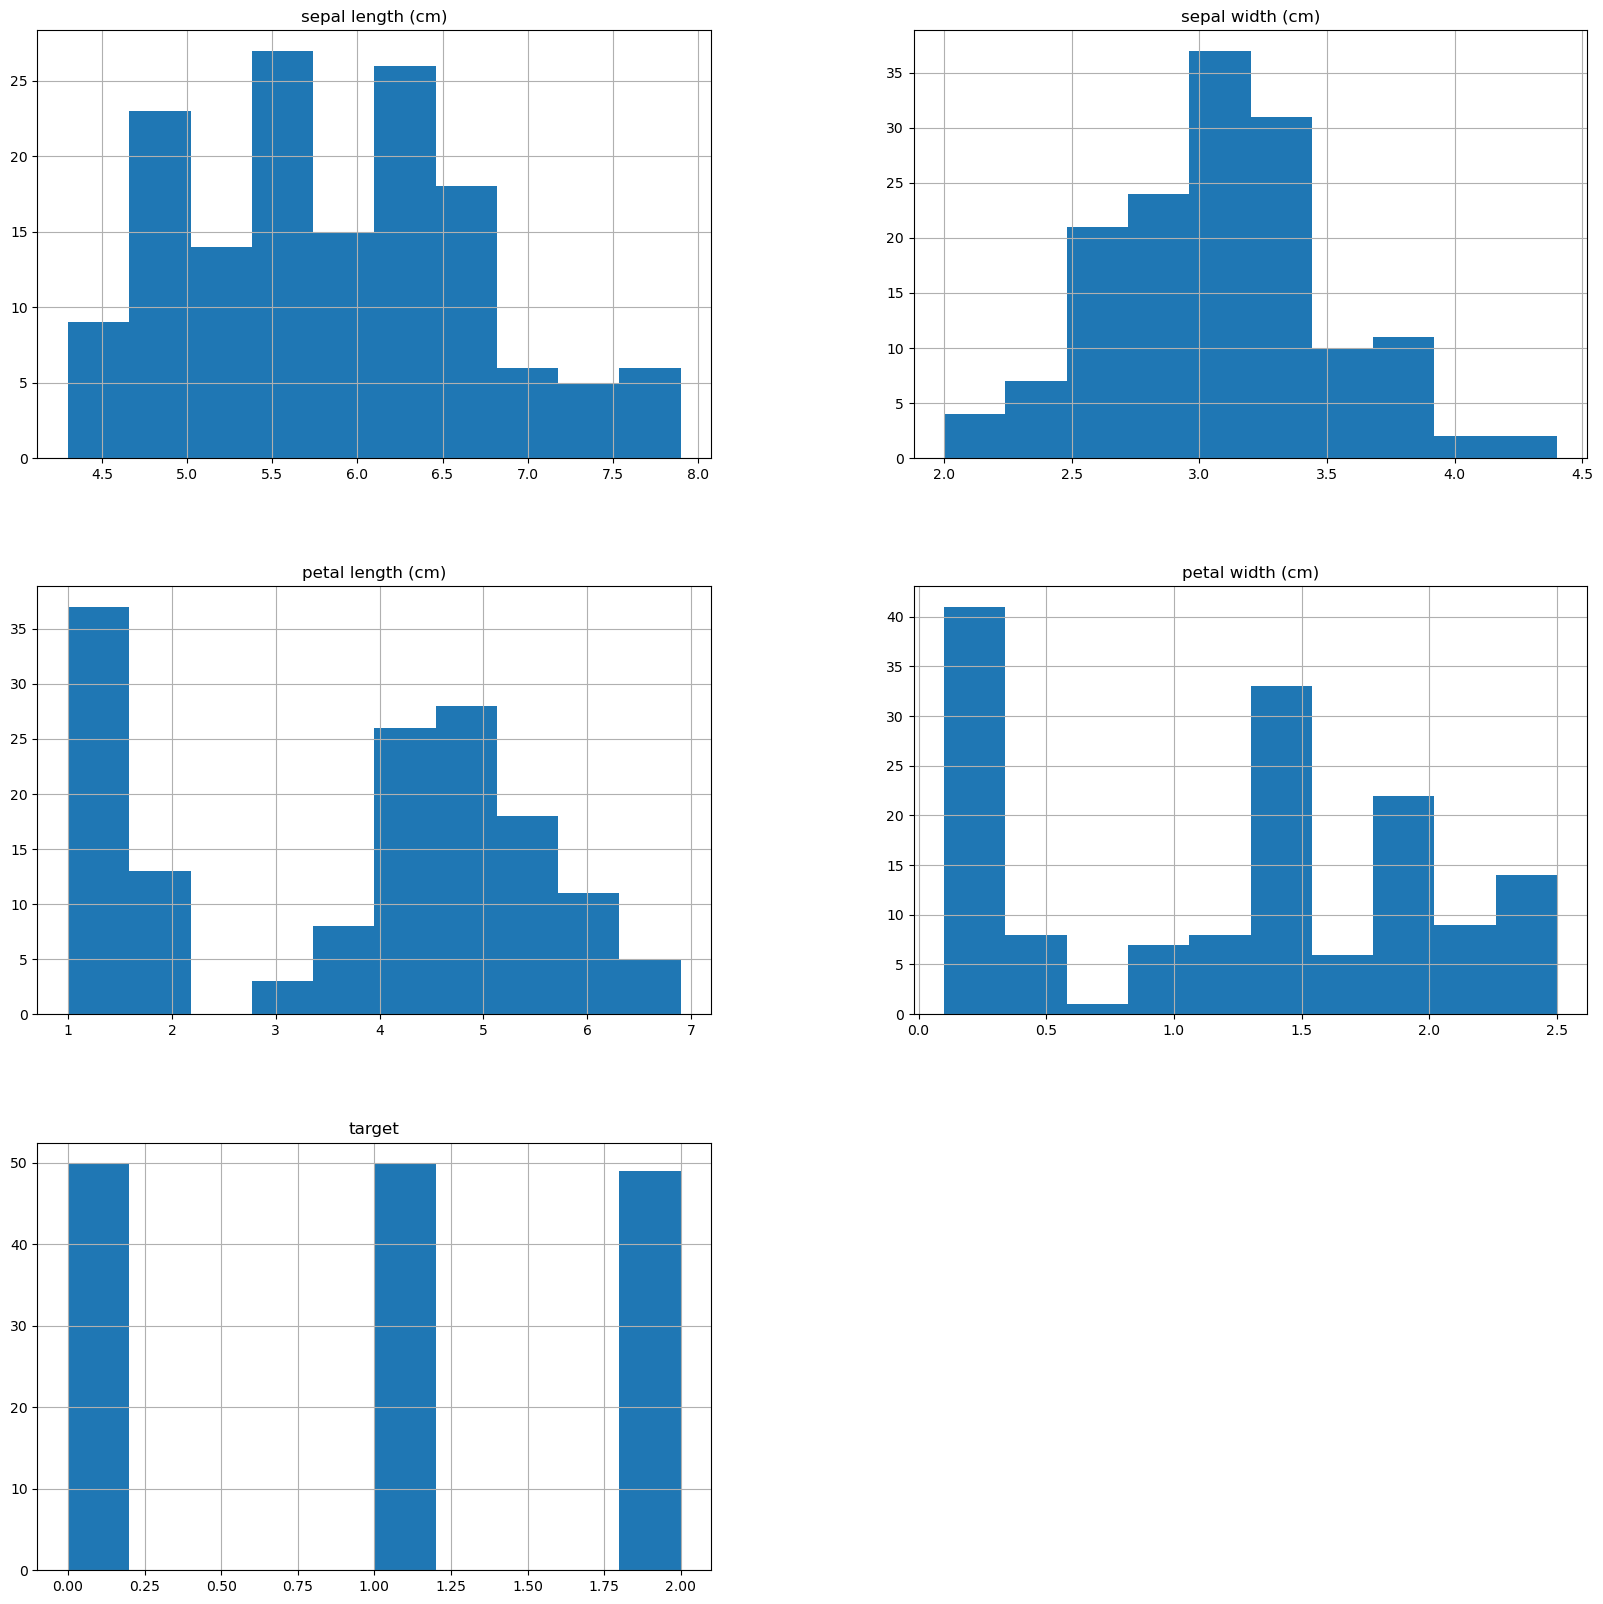

In [35]:
df.hist(figsize = (20,20))

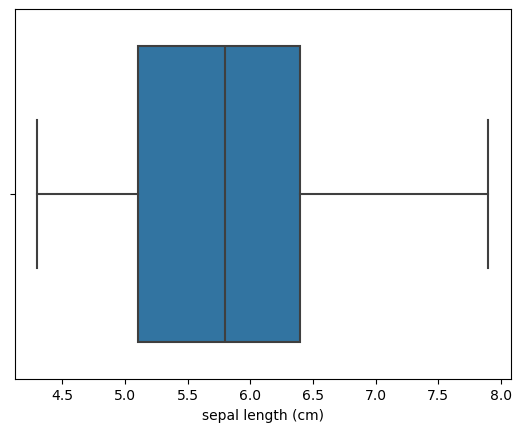

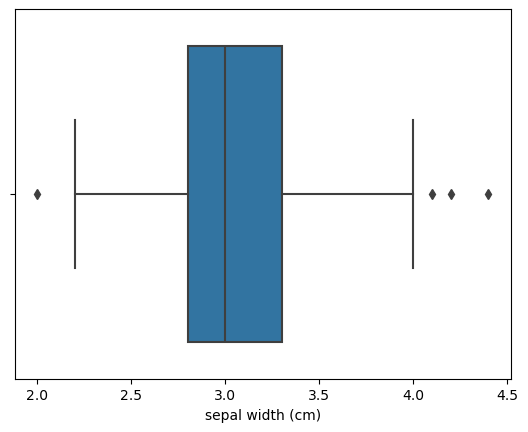

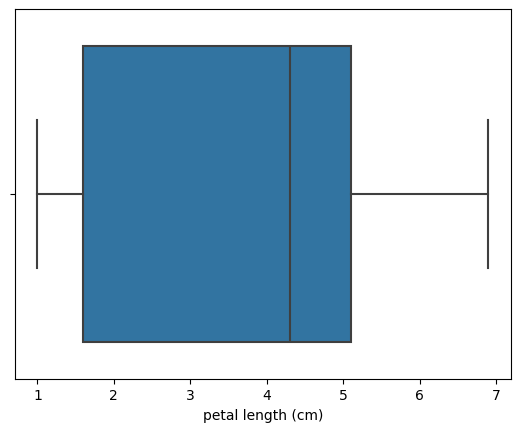

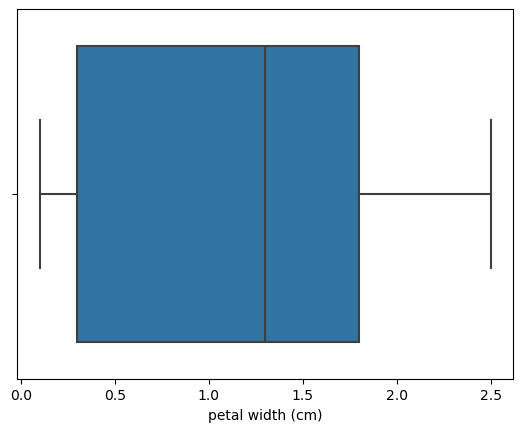

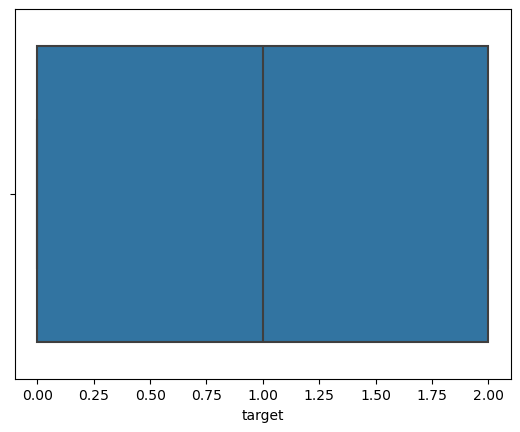

In [34]:
#Boxplot to understand the ouliers 
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [29]:
#Scatter Plot to understand the relationships
#No need to plot the scatter plot against target values bcz no need of y values incase of unsupervised algorithms.

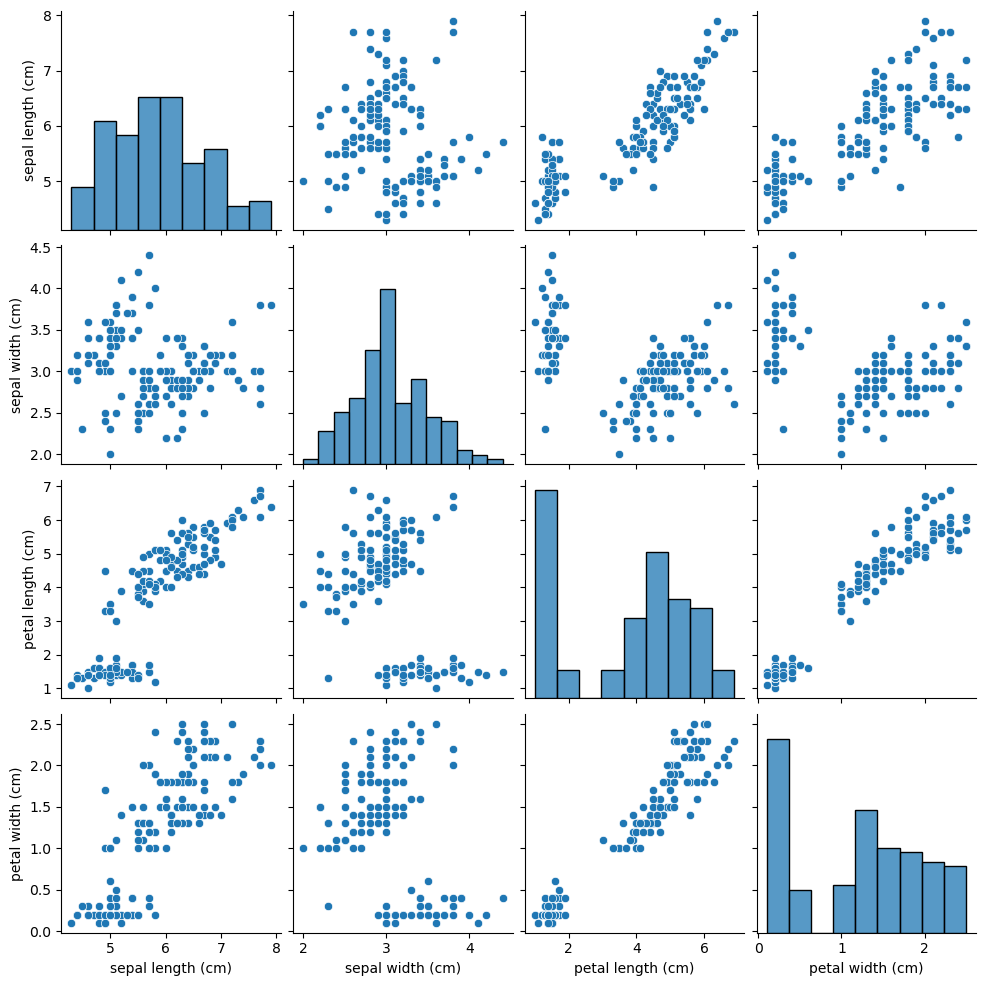

In [67]:
# Draw scatter plot for every feature
sns.pairplot(df)
plt.show()

In [36]:
df.select_dtypes(include="number").columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [37]:
#Correlation with heat map to interpret the relation
s=df.select_dtypes(include='number').corr()
s

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


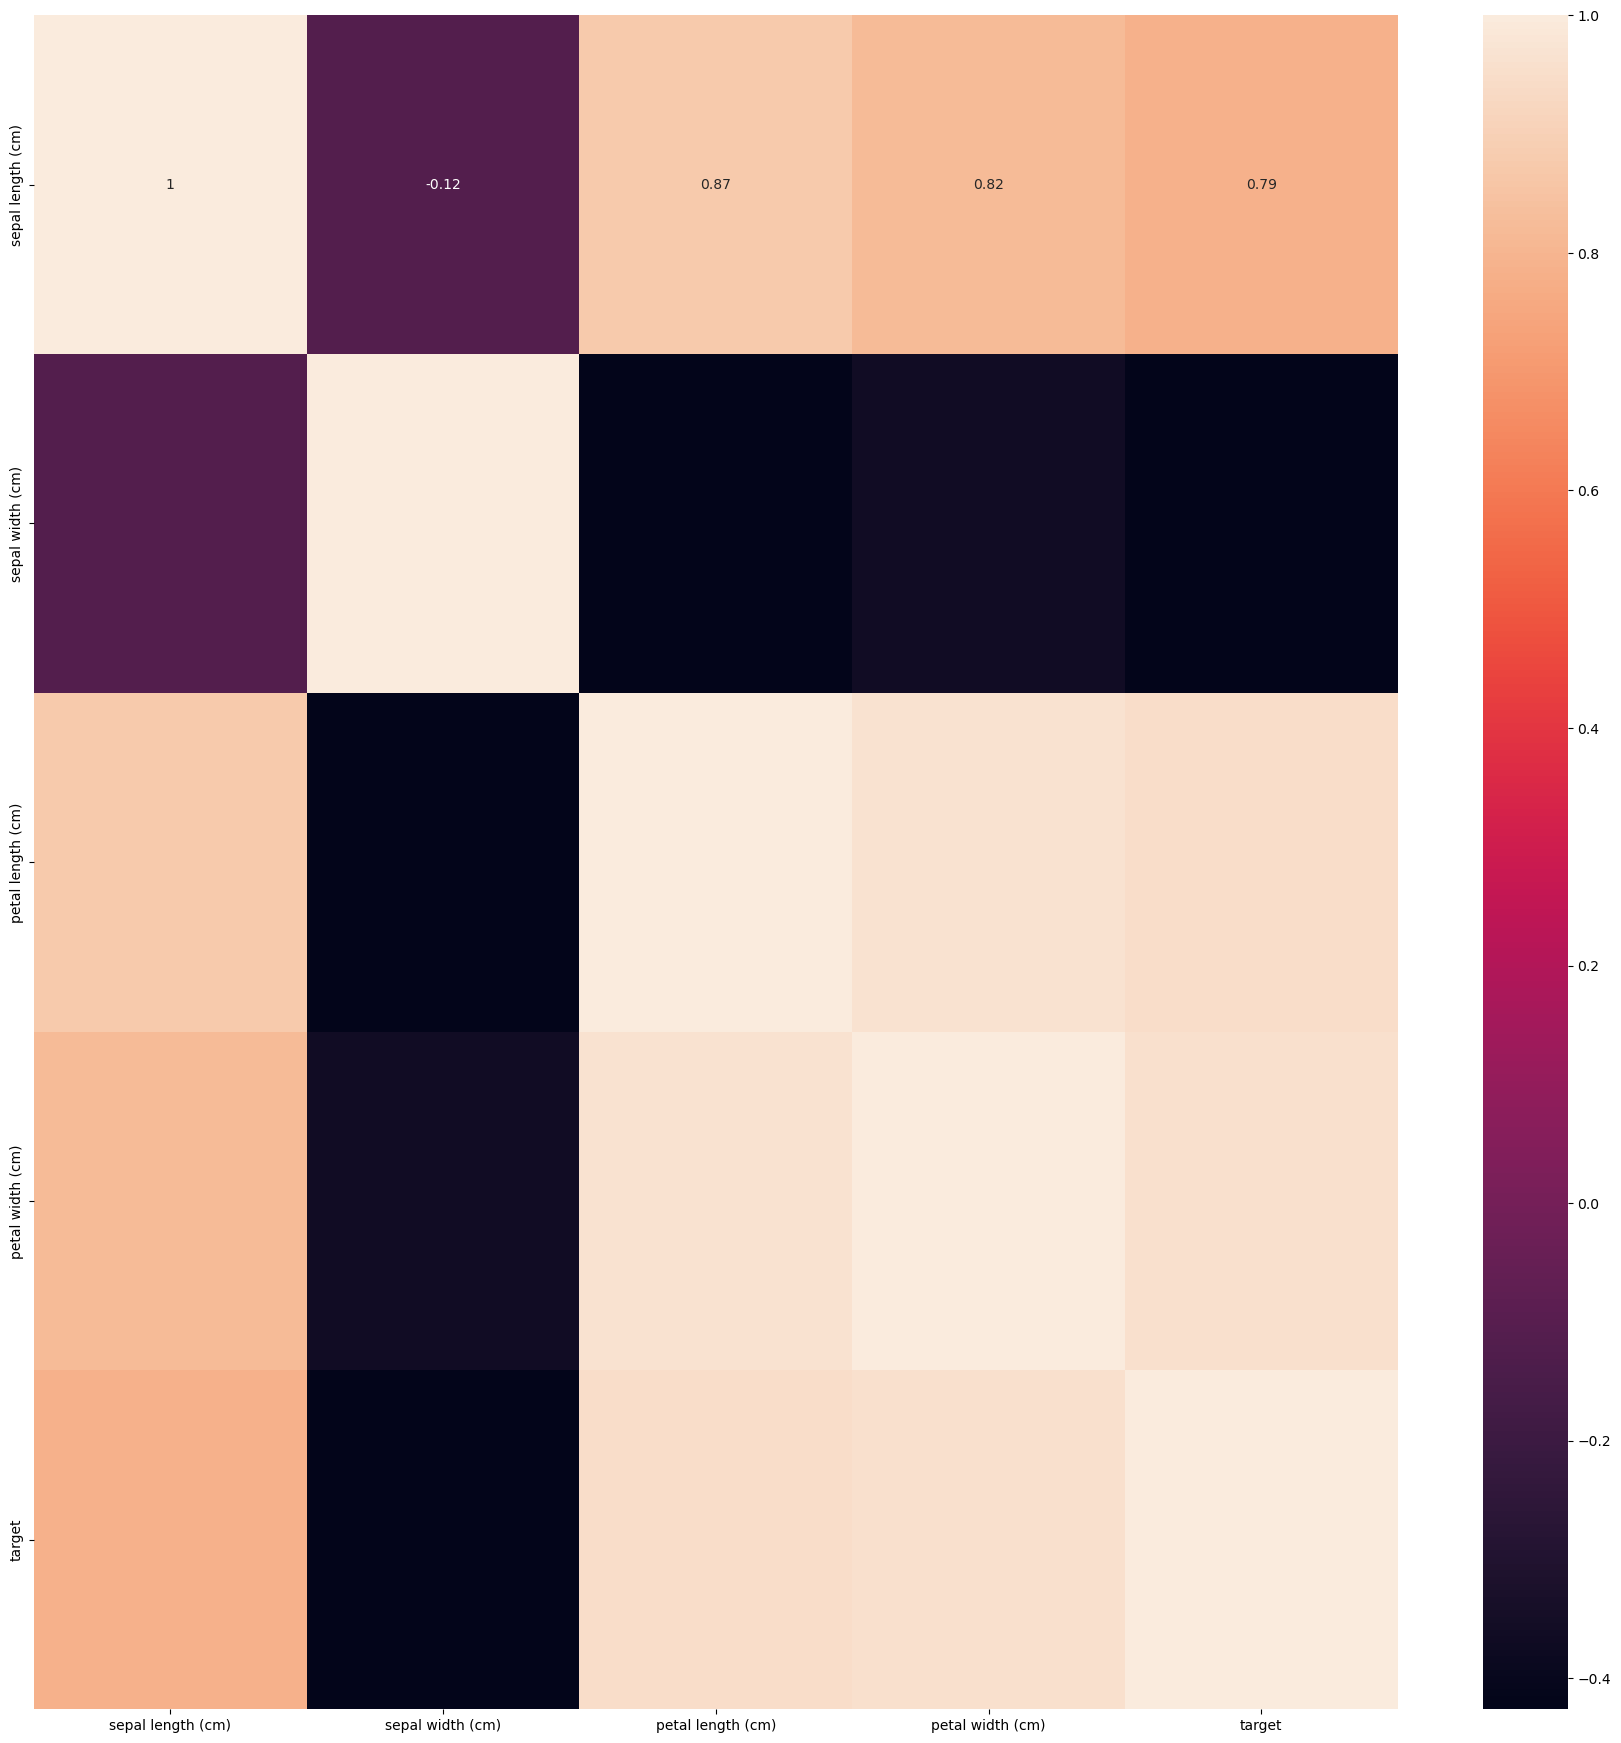

In [39]:
plt.figure(figsize=(22, 22))
sns.heatmap(s,annot=True)
plt.show()

# 1. Scatter Plot of Clusters (K-Means with PCA)


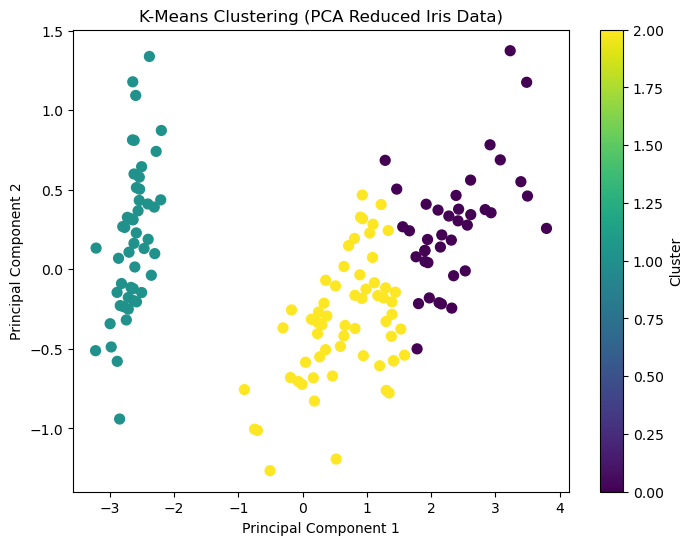

In [43]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

# Apply KMeans clustering (3 clusters, since Iris has 3 species)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA Reduced Iris Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


Pair Plot (with PCA): A pair plot is used to visualize relationships between PCA components, with points colored by clusters.


# 2. Dendrogram for Hierarchical Clustering

Dendrogram for Hierarchical Clustering: This plot visualizes the hierarchical clustering process, where each leaf represents a sample, and branches show how clusters are formed.



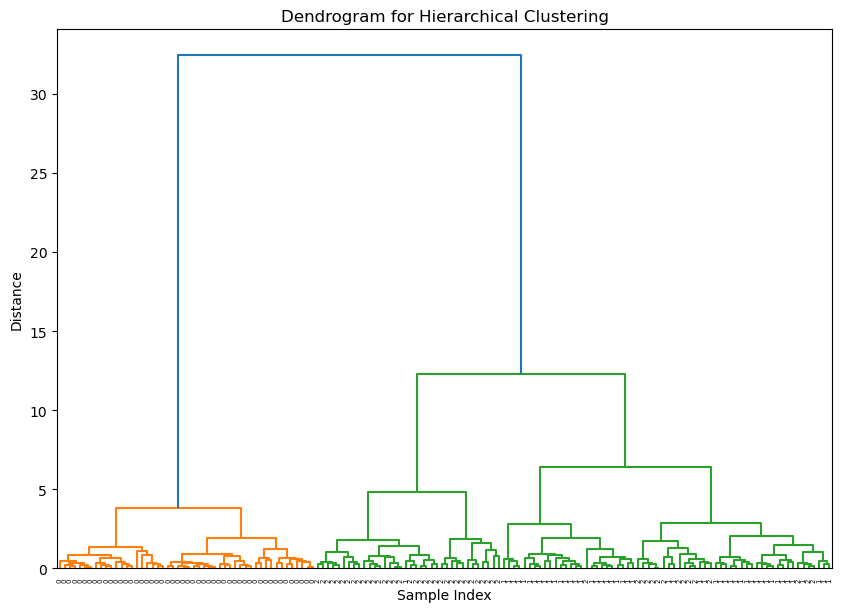

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering on the data
linked = linkage(iris.data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=iris.target)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


# EDA Completed

# Step:5 -  Missing Value Treatments

# Choose the methodes of imputing missing values 
# Mean, Median , Mode , KNNImputer
 
#No Missing value in datas.So no need of 
#impuations in this dataset.

#If null values are occured delete null 
#df.dropna(inplace=True)
#df.isnull().sum()
#No null values found
So no need need to drop

In [51]:
df.shape

(149, 5)

# Step : 6- Outliers treatment

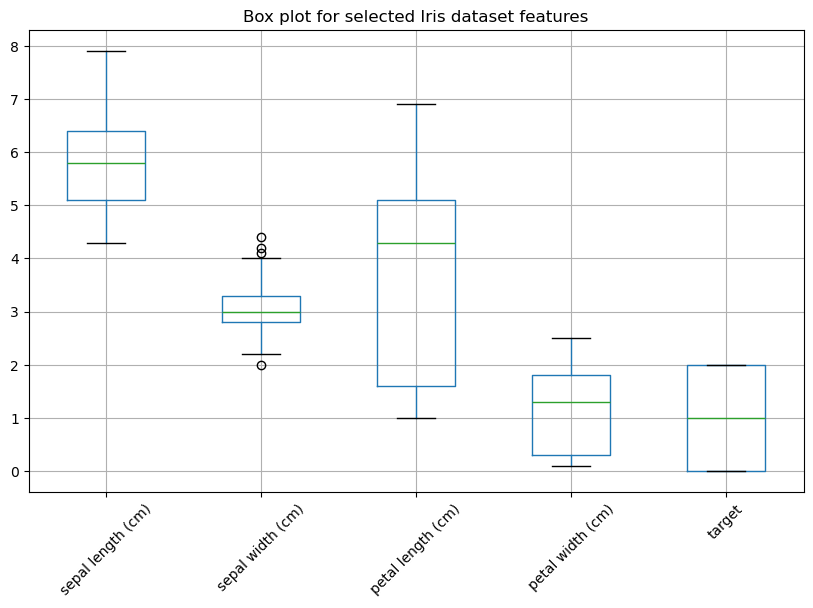

In [52]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target']
plt.figure(figsize=(10, 6))
df.boxplot(column=features)
plt.title('Box plot for selected Iris dataset features')
plt.xticks(rotation=45)
plt.show()

These are the important columns and supposed to outlier treatments on this columns of sepal width.


#### IQR


In [53]:
# Function to get outliers using IQR method and filter out outliers or trim
def get_IQR_outliers(df, column, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_mask =  (df[column] < lower_bound) | (df[column] > upper_bound)
    if filter:                    # if the filter is true
        return df[~outliers_mask] # return outlier filtered dataframe
    else:                         # if the filter is false
        return df[outliers_mask]  # return dataframe of outliers




# Zscore

In [54]:
# Function to get outliers using Zscore method and filter out outliers or trim
def get_zscore_outliers(df, column, threshold=3, filter=False):
    if column not in df.columns:               # Check if the column exists in the DataFrame
        raise ValueError(f"Column '{column}' is not in DataFrame and the DataFrame columns are :{df.columns}")

    x = df[column]                             # Extract the specified column from the DataFrame
    mean = x.mean()                            # Calculate the mean of the column
    standard_deviation = x.std()               # Calculate the standard deviation of the column
    z_scores = (x - mean) / standard_deviation # Calculate Z-scores for each value in the column
    outliers_mask = ((z_scores < -1* threshold) | (z_scores > threshold))
    if filter:                                 # if filter is True
        return df[~outliers_mask]              # return outlier filtered dataframe
    else:                                      # if filter is false
        return df[outliers_mask]               # return outlier dataframe

# Outlier treatment of each column in the data set using for group.

Trim outliers with IQR method on columns 'sepal width(cm)'

In [56]:
tdf = df.copy()
columns = ['sepal width (cm)'] # 'mean area', 'worst area', 'mean concavity', 'worst concavity', 'mean radius', 'worst radius'
for column in columns:
    print(f"Outliers in {column} : {len(get_IQR_outliers(df=tdf, column=column, filter=False))}")
    tdf = get_IQR_outliers(df=tdf, column=column, filter=True)
    print(f"Shape after trimming {tdf.shape}")
tdf.shape

Outliers in sepal width (cm) : 4
Shape after trimming (145, 5)


(145, 5)

In [57]:
print("Before trimming",df.shape)
print("After trimming",tdf.shape)                                                     # outlier trimmed dataframe


Before trimming (149, 5)
After trimming (145, 5)


Outliers are removed successfully using IQR methode

# Visualization after outlier trim and dropping duplicates

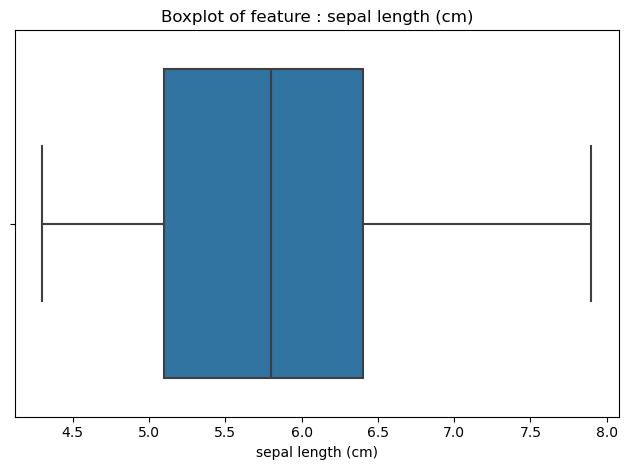

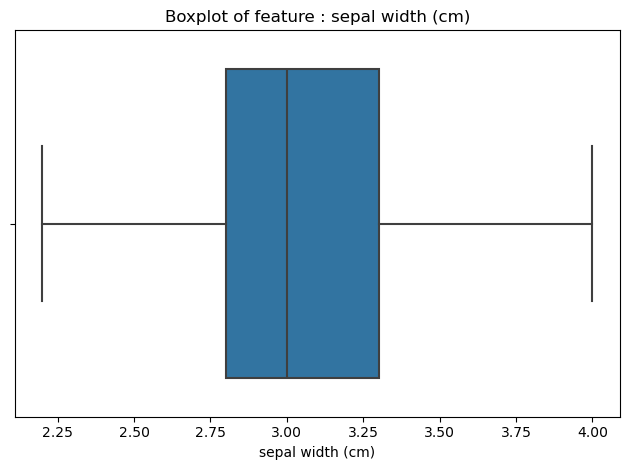

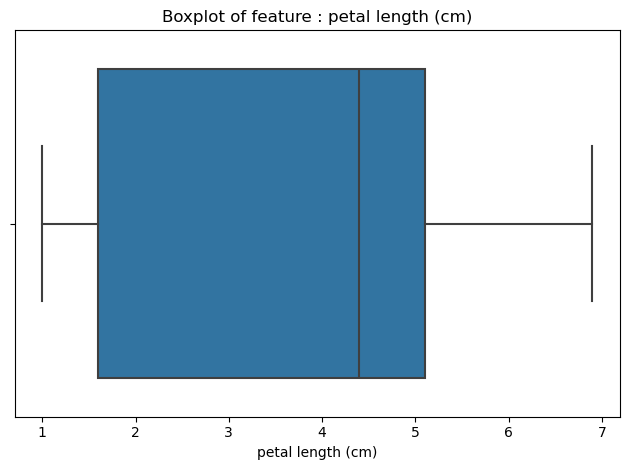

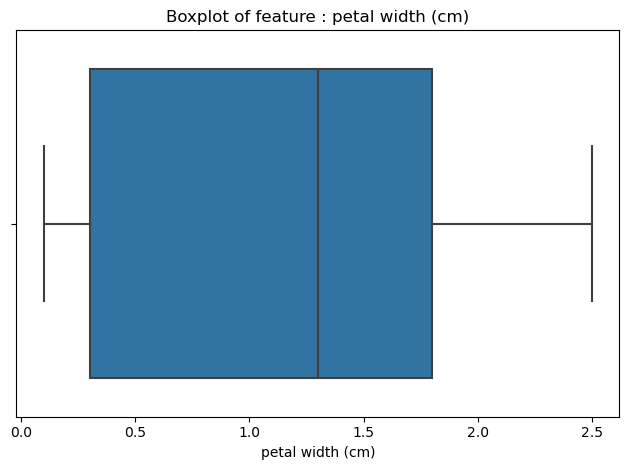

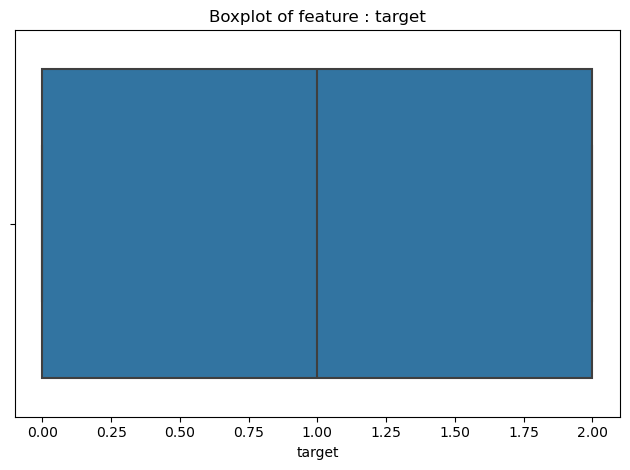

In [68]:
# Outlier detection using boxplot after outlier trim and dropping duplicates
for column in tdf.select_dtypes(include="number").columns:
    if column == "loan_status":
        continue
    sns.boxplot(data=tdf, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

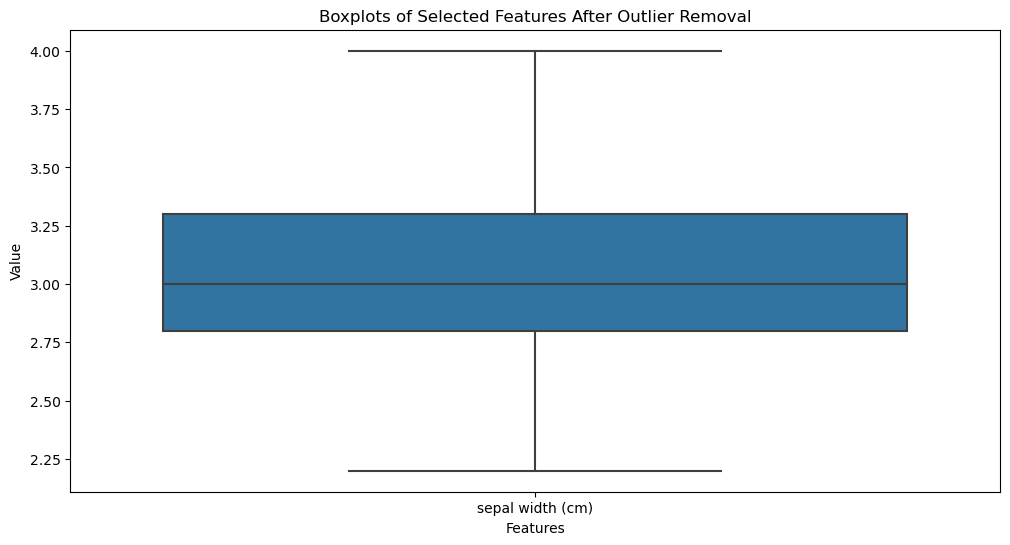

In [69]:
# Plot boxplots for the cleaned features
columns_to_check = ['sepal width (cm)']

plt.figure(figsize=(12, 6))
sns.boxplot(data=tdf[columns_to_check])
plt.title('Boxplots of Selected Features After Outlier Removal')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()


#Almost outliers are removed from the columns

In [60]:
tdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.857241,3.042759,3.797931,1.215862,1.013793
std,0.836971,0.398216,1.760819,0.759905,0.816379
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [61]:
tdf.shape

(145, 5)

# Encoding

In [72]:
tdf.reset_index(drop=True, inplace=True) # reset df index

In [73]:
tdf.info() # show data types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  145 non-null    float64
 1   sepal width (cm)   145 non-null    float64
 2   petal length (cm)  145 non-null    float64
 3   petal width (cm)   145 non-null    float64
 4   target             145 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.2 KB


# Here is no need of encoding because no categorical data found.

# 6. Scaling

Scaling is a preprocessing technique used in data preparation for machine learning and statistical analysis. The main purpose of scaling is to standardize the range of independent variables or features in the dataset. Here’s a deeper dive into what scaling is, why it is important, and the different methods used for scaling:

What is Scaling?
Scaling involves transforming the features in a dataset so that they have specific properties, such as a consistent range or distribution. This process helps to ensure that each feature contributes equally to the analysis and modeling process.

Why is Scaling Important?
Equal Contribution: Features with larger magnitudes can disproportionately influence the results of certain algorithms. Scaling ensures that each feature contributes equally to the model.

Improved Model Performance: Many machine learning algorithms converge faster and perform better when the data is scaled. For instance, gradient descent-based algorithms (like linear regression, logistic regression, and neural networks) often require feature scaling to optimize the weights effectively.

Distance-based Algorithms: Algorithms like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) rely on distance calculations. If features are on different scales, the distance metrics can become misleading.

Assumption of Normality: Some statistical techniques assume that the data is normally distributed. Scaling can help to meet this assumption and improve the effectiveness of the analysis.

Common Scaling Techniques
Min-Max Scaling (Normalization):
 
Range: Scales the data to a fixed range, typically [0, 1].
Use Case: Useful for algorithms that require bounded input values, such as neural networks.

Standardization (Z-score Scaling):

Characteristics: Centers the data around the mean (0) and scales it to have a standard deviation of 1.
Use Case: Suitable for algorithms that assume normally distributed data, such as linear regression.
Robust Scaling:

IQR

Characteristics: Uses the median and the interquartile range (IQR) to scale features, making it robust to outliers.
Use Case: Effective when the data contains outliers that cannot be removed.
Conclusion
Scaling is a crucial step in the data preprocessing pipeline, especially when working with machine learning algorithms sensitive to feature magnitudes or distances. By applying the appropriate scaling technique, you can improve the performance of your models and ensure more accurate and reliable results.




# 6. Feature Selection

Common Methods for Feature Selection

Filter Methods:

 Statistical Tests: 
  Use statistical tests to evaluate the relationship between each feature and the target variable (e.g., chi-square test for       categorical features, ANOVA for continuous features).
Correlation Coefficient: 
        Calculate the correlation matrix and select features with a high correlation to the target variable while removing highly correlated features among themselves.

Wrapper Methods,Embedded Methods are using ML algorithms.
   
   PCA:
    Principal Component Analysis (PCA)


For unsupervised learning, you typically don't have a target variable (y), since the goal is to find patterns in the data without any predefined labels. In this case, we only need the features (X) from the dataset, and you can split the data into training and test sets to evaluate clustering or other unsupervised techniques.




1. Variance Thresholding:
This method removes features that have low variance, assuming that features with little variance don't contain useful information.



In [77]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.2)  # Set threshold to a value
X_selected = selector.fit_transform(X)

# Print selected features
print("Selected features based on variance thresholding:")
print(X_selected)


Selected features based on variance thresholding:
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.  0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.  1.6 0.2]
 [5.  1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.2]
 [5.  1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.4 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.  1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.  1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1.4 0.2]
 [5.3 1.5 0.2]
 [5.  1.4 0.2]
 [7.  4.7 1.4]
 [6.4 4.5 1.5]
 [6.9 4.9 1.5]
 [5.5 4.  1.3]
 [6.5 4.6 1.5]
 [5.7 4.5 1.3]
 [6.3 4.7 1.6]
 [4.9 3.3 1. ]
 [6.6 4.6 1.3]
 [5.2 3.9 1.4]
 [5.  3.5 1. ]
 [5.9 4.2 1.5]
 [6.  4.  1. ]
 [6.1

2. Principal Component Analysis (PCA):
PCA is a widely used technique for unsupervised feature selection. It transforms the dataset into a lower-dimensional space by capturing the directions (principal components) with the most variance.



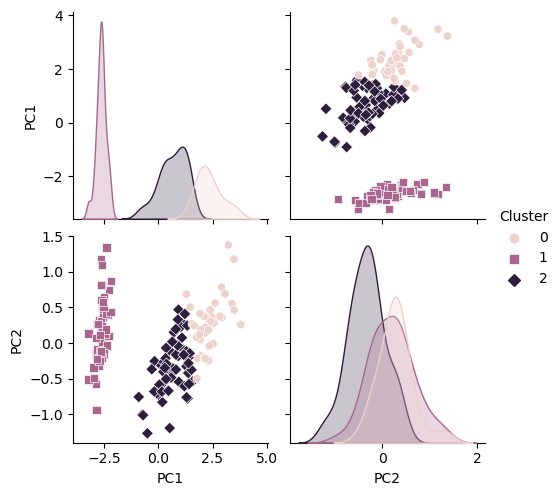

In [79]:
import seaborn as sns
import pandas as pd

# Create DataFrame with PCA components and clusters
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Create pairplot using Seaborn
sns.pairplot(pca_df, hue='Cluster', markers=["o", "s", "D"])
plt.show()


 Elbow Method (for K-Means)
When performing K-Means, you can use the elbow method to choose the optimal number of clusters by plotting the inertia (sum of squared distances to the nearest cluster center) against the number of clusters.

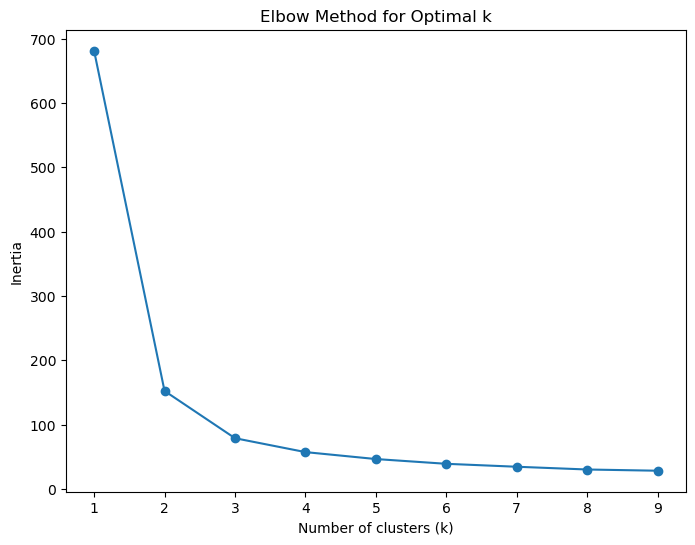

In [80]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


# Here are different methods for selecting features in an unsupervised learning context. These include methods like
    Variance Thresholding
    Principal Component Analysis (PCA)
    Correlation Matrix
    and Autoencoders.



In [83]:
#Variance Thresholding

from sklearn.feature_selection import VarianceThreshold

# Apply Variance Threshold (e.g., remove features with variance below 0.2)
selector = VarianceThreshold(threshold=0.2)
iris_selectedThreshold = selector.fit_transform(iris.data)

# Display the selected features
print("Selected Features based on variance thresholding:")
print(iris_selectedThreshold)

Selected Features based on variance thresholding:
[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]
 [5.4 1.7 0.4]
 [4.6 1.4 0.3]
 [5.  1.5 0.2]
 [4.4 1.4 0.2]
 [4.9 1.5 0.1]
 [5.4 1.5 0.2]
 [4.8 1.6 0.2]
 [4.8 1.4 0.1]
 [4.3 1.1 0.1]
 [5.8 1.2 0.2]
 [5.7 1.5 0.4]
 [5.4 1.3 0.4]
 [5.1 1.4 0.3]
 [5.7 1.7 0.3]
 [5.1 1.5 0.3]
 [5.4 1.7 0.2]
 [5.1 1.5 0.4]
 [4.6 1.  0.2]
 [5.1 1.7 0.5]
 [4.8 1.9 0.2]
 [5.  1.6 0.2]
 [5.  1.6 0.4]
 [5.2 1.5 0.2]
 [5.2 1.4 0.2]
 [4.7 1.6 0.2]
 [4.8 1.6 0.2]
 [5.4 1.5 0.4]
 [5.2 1.5 0.1]
 [5.5 1.4 0.2]
 [4.9 1.5 0.2]
 [5.  1.2 0.2]
 [5.5 1.3 0.2]
 [4.9 1.4 0.1]
 [4.4 1.3 0.2]
 [5.1 1.5 0.2]
 [5.  1.3 0.3]
 [4.5 1.3 0.3]
 [4.4 1.3 0.2]
 [5.  1.6 0.6]
 [5.1 1.9 0.4]
 [4.8 1.4 0.3]
 [5.1 1.6 0.2]
 [4.6 1.4 0.2]
 [5.3 1.5 0.2]
 [5.  1.4 0.2]
 [7.  4.7 1.4]
 [6.4 4.5 1.5]
 [6.9 4.9 1.5]
 [5.5 4.  1.3]
 [6.5 4.6 1.5]
 [5.7 4.5 1.3]
 [6.3 4.7 1.6]
 [4.9 3.3 1. ]
 [6.6 4.6 1.3]
 [5.2 3.9 1.4]
 [5.  3.5 1. ]
 [5.9 4.2 1.5]
 [6.  4.  1. ]
 [6.1

Consider a feature in a dataset where 99% of the values are the same (e.g., 0.1 for most samples). Since this feature does not change much across the dataset, it won't help in clustering. By applying variance thresholding, we can remove such features to improve the model's performance.

How Variance Threshold Works:
Set a Threshold: You define a threshold for variance (e.g., 0.2). Features whose variance is lower than this threshold are removed.
Keep High-Variance Features: Features with variance greater than or equal to the threshold are kept for further analysis.
Key Steps:
Calculate variance for each feature in the dataset.
Compare each feature's variance to the specified threshold.
Select or remove the feature based on the variance threshold.


Selected Features using PCA (2 components):
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.866241

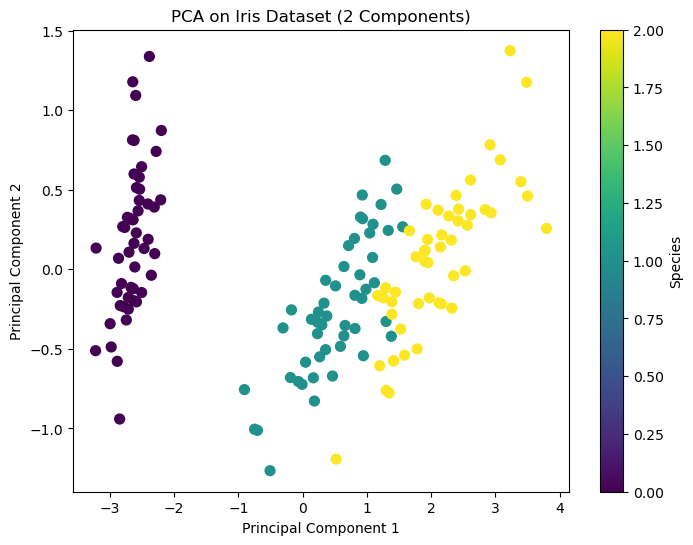

Explained Variance Ratio of Each Principal Component:
[0.92461872 0.05306648]


In [87]:
# Principal Component Analysis (PCA)
#PCA reduces the dataset into fewer dimensions by selecting components that capture the most variance.

# Apply PCA to reduce the dataset to 2 principal components

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
Iris_Selected_pca  = pca.fit_transform(iris.data)

# Display the PCA-reduced features
print("Selected Features using PCA (2 components):")
print(Iris_Selected_pca)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add the original target labels for visualization purposes
df_pca['species'] = iris.target

# Plot the data in the PCA space (2 components)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['species'], cmap='viridis', s=50)
plt.title('PCA on Iris Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.show()

# Explained variance ratio
print("Explained Variance Ratio of Each Principal Component:")
print(pca.explained_variance_ratio_)



Explanation of the Code:
Fit PCA: The PCA(n_components=2) reduces the Iris dataset to 2 principal components.
These two components capture the majority of the variance in the dataset.
Transform the Data: The original data is projected onto these two components, reducing it from four dimensions (features) to two.
Plot the PCA Result: The 2D scatter plot shows the distribution of the data in the new PCA space. You can visually inspect how well-separated the clusters are in this reduced space.
Explained Variance: The explained_variance_ratio_ shows how much variance each principal component captures. For example, PC1 might capture 70% of the variance, and PC2 might capture 20%.


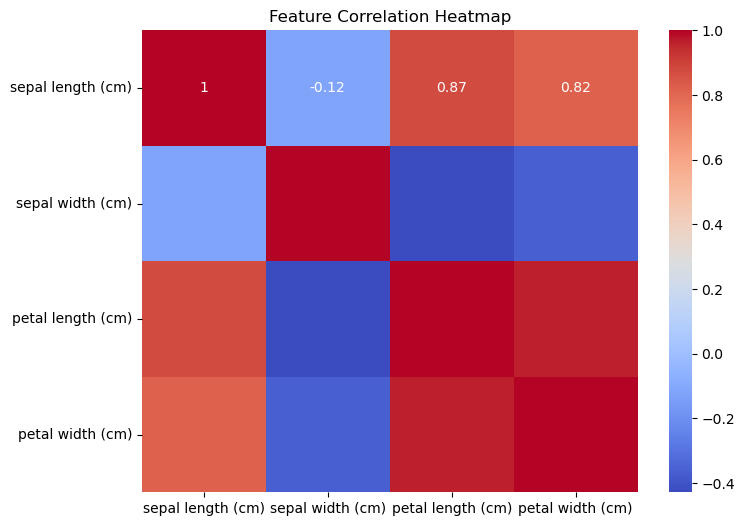

In [89]:
# Correlation Matrix for Feature Selection
#You can use the correlation matrix to identify and remove highly correlated features, which may be redundant.

# Compute and plot the correlation matrix
corr_matrix = df.corr()

# Plot heatmap of feature correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Example: If two features are highly correlated (>0.9), we might remove one of them manually.


In [91]:
# Autoencoder for Feature Selection (Dimensionality Reduction)
#Autoencoders compress data into a lower-dimensional space by learning a latent representation.

from sklearn.neural_network import MLPRegressor


iris_selected_Autoencoder = iris.data  # Features

# Train an autoencoder (MLPRegressor with a hidden layer of 2 neurons)
autoencoder = MLPRegressor(hidden_layer_sizes=(2,), max_iter=1000)
autoencoder.fit(iris_selected_Autoencoder, iris_selected_Autoencoder)  # Training to reconstruct the input

# Use the hidden layer's encoding (2-dimensional) as selected features
X_encoded = autoencoder.predict(iris_selected_Autoencoder)

# Display the encoded (compressed) features
print("Selected Features using Autoencoder:")
print(X_encoded)


Selected Features using Autoencoder:
[[1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.59707497 0.43454422 1.17348755 0.58234052]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.61112568 0.46906029 1.23603703 0.57414939]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354 1.27659959 0.56883754]
 [1.6202374  0.49144354

What is an Autoencoder?
An autoencoder is a type of neural network designed to learn efficient representations (also called encodings) of data, typically for the purpose of dimensionality reduction. The network tries to compress the input into a lower-dimensional space and then reconstruct it back to its original form.

Explanation of the Code:
MLPRegressor: This is a type of neural network from sklearn that is typically used for regression tasks. In this case, we use it to implement a simple autoencoder.

hidden_layer_sizes=(2,): This specifies that there is one hidden layer with 2 neurons, which represents the encoding or the bottleneck layer. This layer captures the most important information from the input.
max_iter=1000: This means the model will train for up to 1000 iterations to minimize the reconstruction error.
Training as an Autoencoder:

We are training the model to reconstruct the input data. This means the input data X is both the input and the target for training.
The network learns to encode the data into 2 dimensions (since the hidden layer has 2 neurons) and then decode it back to the original 4 dimensions (as in the Iris dataset).

When to Use Autoencoders?
Dimensionality Reduction: Autoencoders are a powerful way to reduce the dimensionality of data, especially when the data is highly non-linear.
Data Compression: They can be used for compressing data in a way that retains important features.
Anomaly Detection: Since an autoencoder tries to reconstruct its input, it can be used to detect anomalies. If the reconstruction error for a data point is high, it may be an outlier.


In [92]:
#Feature Selection with Mutual Information (for mixed data)

#Though often used in supervised learning, Mutual Information can help understand the dependency between 
#variables in unsupervised settings.

from sklearn.feature_selection import mutual_info_classif

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Apply mutual information for each feature (unsupervised, we do this for comparison)
mi = mutual_info_classif(X, iris.target)

# Create a DataFrame of features and their mutual information scores
mi_df = pd.DataFrame(list(zip(X.columns, mi)), columns=["Feature", "Mutual Information"])
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

# Display the scores
print(mi_df)



             Feature  Mutual Information
3   petal width (cm)            0.988288
2  petal length (cm)            0.985230
0  sepal length (cm)            0.490199
1   sepal width (cm)            0.256649


# Summary of Techniques:
Variance Thresholding: Eliminates low-variance features.
PCA: Reduces dimensionality by selecting components with the highest variance.
Correlation Matrix: Helps remove highly correlated (redundant) features.
Autoencoders: Neural networks reduce data to a latent representation.
Mutual Information: Measures feature dependency (used here for understanding data).


# ML Algorithms For Unsupervised Learning

Here’s a basic example of an unsupervised machine learning algorithm applied to the Iris dataset using 
    K-Means clustering. 
Can also try other algorithms like 
    DBSCAN,
    Agglomerative Clustering, 
    or Hierarchical Clustering. 
This example focuses on clustering and does not use the target label (species) since it’s unsupervised learning.

# K-Means Clustering on the Iris Dataset


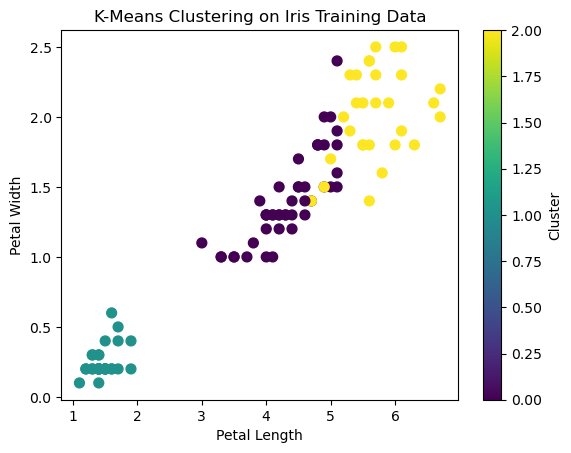

Cluster Centers:
[[5.79555556 2.69555556 4.34444444 1.41777778]
 [4.96451613 3.37741935 1.46451613 0.2483871 ]
 [6.85517241 3.10344828 5.70689655 2.02068966]]


In [96]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (unsupervised, so we use only X)
X_train, X_test = train_test_split(iris.data, test_size=0.3, random_state=42)

# Create the K-Means model (we assume 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the K-Means model to the training data
kmeans.fit(X_train)

# Predict the clusters for both training and test sets
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Visualizing the clusters (e.g., using Petal Length and Petal Width from the training set)
plt.scatter(X_train[:, 2], X_train[:, 3], c=train_clusters, cmap='viridis', s=50)
plt.title('K-Means Clustering on Iris Training Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster')
plt.show()

# Check the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


# Steps Breakdown:
Split the Data:

Since it's unsupervised learning, we split only the feature data (X) into training and testing sets using train_test_split().
Fit the Model:

We fit the K-Means clustering model on the training data (X_train).
We also predict the clusters on the test set (X_test).
Visualize:

A scatter plot is used to visualize the clusters based on the training data. You can change the feature dimensions you want to visualize.
You can also visualize how well the model groups the test data similarly.
Cluster Centers: The kmeans.cluster_centers_ shows the coordinates of the centroids for each cluster.



# Example: DBSCAN Clustering on Training Data
#Here’s an example of using DBSCAN (a density-based clustering algorithm).



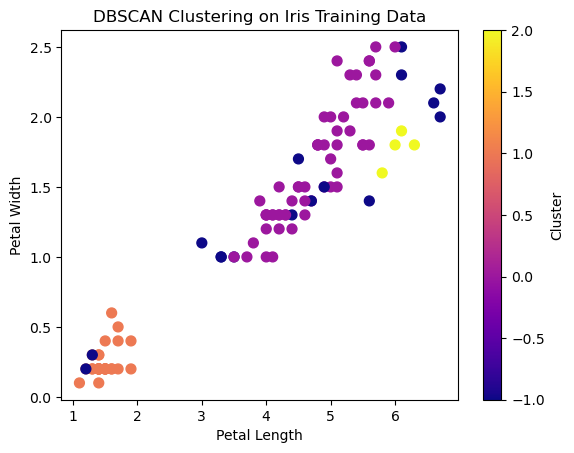

In [98]:
from sklearn.cluster import DBSCAN

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Create the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the training data and predict clusters for the training data
train_clusters = dbscan.fit_predict(X_train)

# Visualize the clusters (using two features from the training set, e.g., Petal Length and Petal Width)
plt.scatter(X_train[:, 2], X_train[:, 3], c=train_clusters, cmap='plasma', s=50)
plt.title('DBSCAN Clustering on Iris Training Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster')
plt.show()


# Explanation of Fix:
DBSCAN Fitting and Prediction:

We are using dbscan.fit_predict(X_train) to both fit the DBSCAN model and predict the cluster labels for the training data (X_train). This returns an array of cluster labels (train_clusters), where each sample is assigned a cluster number or -1 (if it is considered noise/outlier).
Matching Shapes:

The number of rows in X_train[:, 2] and X_train[:, 3] (the Petal Length and Petal Width) matches the length of train_clusters, ensuring no mismatch.
Plotting:

We use train_clusters to color the points in the scatter plot. Each unique cluster will have a different color. Points marked as noise (-1) will also be displayed in a unique color.

Key Points for DBSCAN:
DBSCAN is different from K-Means in that it doesn't require the number of clusters to be specified beforehand. It determines clusters based on density (eps defines how close points should be to each other to form a cluster).
Noise Points: Any points that don't belong to any cluster are labeled -1 and treated as outliers.
This should work for your unsupervised DBSCAN clustering with the correct train_clusters size matching the input data. Let me know if you need more help!



# Example: Hierarchical (Agglomerative) Clustering on Training Data
You can also try Agglomerative Clustering, which is a type of hierarchical clustering.



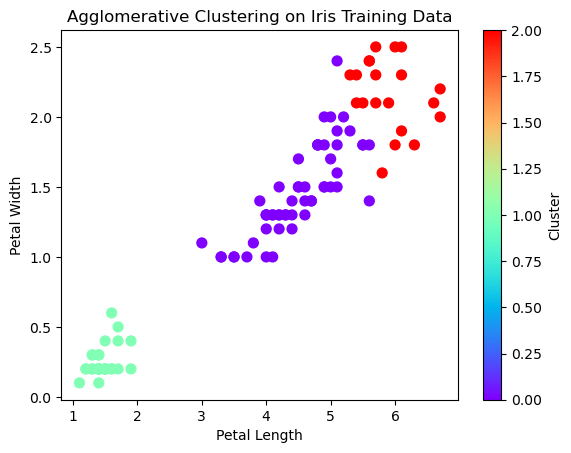

In [99]:
from sklearn.cluster import AgglomerativeClustering

# Create the Agglomerative Clustering model
agglo = AgglomerativeClustering(n_clusters=3)

# Fit the model to the training data
train_clusters = agglo.fit_predict(X_train)

# Visualize the clusters (using two features from the training set)
plt.scatter(X_train[:, 2], X_train[:, 3], c=train_clusters, cmap='rainbow', s=50)
plt.title('Agglomerative Clustering on Iris Training Data')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster')
plt.show()

# Explanation:
Agglomerative Clustering is a bottom-up approach that merges clusters iteratively until a specified number of clusters is reached.
Summary of Steps:
Split the Data: Split the dataset into training and testing sets using only the features (X), since unsupervised algorithms do not use target labels.
Fit the Model: Train the unsupervised model (e.g., K-Means, DBSCAN, Agglomerative Clustering) on the training data.
Predict Clusters: Predict the clusters for the training and test data.
Visualize: Use plots (like scatter plots) to visualize the clusters.
